In [3]:
# initial setup
try:
    # settings colab:
    import google.colab
    
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.22.1 already installed
xlrd=1.2.0 already installed
nltk=3.4.5 already installed
unidecode=1.0.23 already installed
Running command `conda install --yes pydotplus=2.0.2`... ok
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3\envs\dhdsblendv2

  added / updated specs:
    - pydotplus=2.0.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    pydotpl

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import make_classification

In [7]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.metrics import accuracy_score

In [231]:
df = pd.read_csv('Data/COMERCIOS.TXT', sep='\t')

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26082 entries, 0 to 26081
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PERIODO                        26082 non-null  object 
 1   ID_ZONA                        26082 non-null  int64  
 2   RUBRO                          26082 non-null  object 
 3   NIVEL_RIESGO                   26082 non-null  int64  
 4   APERTURAS                      26082 non-null  float64
 5   CIERRES                        26082 non-null  float64
 6   SUPERVIVENCIA                  21473 non-null  float64
 7   PROMEDIO_VENTAS                26082 non-null  int64  
 8   NIVEL_CRECIMIENTO              23184 non-null  float64
 9   NIVEL_ESTABILIDAD              24843 non-null  float64
 10  CANTIDAD_LOCALES               26082 non-null  int64  
 11  SUPERV_MENOS_1                 26082 non-null  float64
 12  SUPERV_ENTRE_1_Y_2             26082 non-null 

In [233]:
df.dropna(inplace=True)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13890 entries, 8694 to 26081
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PERIODO                        13890 non-null  object 
 1   ID_ZONA                        13890 non-null  int64  
 2   RUBRO                          13890 non-null  object 
 3   NIVEL_RIESGO                   13890 non-null  int64  
 4   APERTURAS                      13890 non-null  float64
 5   CIERRES                        13890 non-null  float64
 6   SUPERVIVENCIA                  13890 non-null  float64
 7   PROMEDIO_VENTAS                13890 non-null  int64  
 8   NIVEL_CRECIMIENTO              13890 non-null  float64
 9   NIVEL_ESTABILIDAD              13890 non-null  float64
 10  CANTIDAD_LOCALES               13890 non-null  int64  
 11  SUPERV_MENOS_1                 13890 non-null  float64
 12  SUPERV_ENTRE_1_Y_2             13890 non-nu

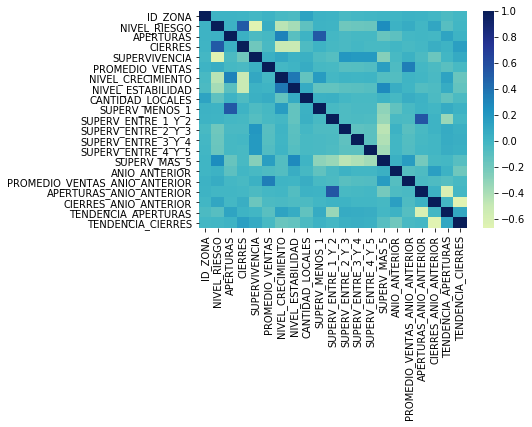

In [235]:
sns.heatmap(df.corr(), center=0, cmap="YlGnBu", annot=False);

In [236]:
df.head(3)

,PERIODO,ID_ZONA,RUBRO,NIVEL_RIESGO,APERTURAS,CIERRES,SUPERVIVENCIA,PROMEDIO_VENTAS,NIVEL_CRECIMIENTO,NIVEL_ESTABILIDAD,...,SUPERV_ENTRE_2_Y_3,SUPERV_ENTRE_3_Y_4,SUPERV_ENTRE_4_Y_5,SUPERV_MAS_5,ANIO_ANTERIOR,PROMEDIO_VENTAS_ANIO_ANTERIOR,APERTURAS_ANIO_ANTERIOR,CIERRES_ANIO_ANTERIOR,TENDENCIA_APERTURAS,TENDENCIA_CIERRES
8694,Enero - Abril 2017,1,Bares y Cafés,1,0.00,0.00,50.0,4,3.0,3.0,...,100.00,0.00,0.00,0.00,2016.0,1.0,0.00,0.0,100.0,100.0
8696,Enero - Abril 2017,1,Comida al Paso,4,7.89,10.26,50.0,2,3.0,2.0,...,5.26,7.89,2.63,68.42,2016.0,3.0,2.56,0.0,100.0,100.0
8697,Enero - Abril 2017,1,Ferretería y Construcción,3,4.08,6.00,75.0,2,3.0,2.0,...,6.12,2.04,4.08,75.51,2016.0,2.0,2.04,0.0,100.0,100.0


In [237]:
df['NIVEL_CRECIMIENTO'].unique()

array([3., 4., 1., 2., 5.])

In [217]:
df['NIVEL_ESTABILIDAD'].unique()

array([3., 2., 1., 5., 4.])

In [238]:
df['NIVEL_RIESGO'].value_counts()

1    4807
2    4505
3    3216
4    1177
5     185
Name: NIVEL_RIESGO, dtype: int64

In [239]:
predecir = ['NIVEL_RIESGO']
features = ['ID_ZONA', 'RUBRO', 'APERTURAS',
       'CIERRES', 'PROMEDIO_VENTAS', 'NIVEL_CRECIMIENTO',
       'NIVEL_ESTABILIDAD', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5', 'ANIO_ANTERIOR',
       'PROMEDIO_VENTAS_ANIO_ANTERIOR', 'APERTURAS_ANIO_ANTERIOR',
       'CIERRES_ANIO_ANTERIOR', 'TENDENCIA_APERTURAS',
       'TENDENCIA_CIERRES']

In [240]:
df['ID_ZONA'] = df['ID_ZONA'].astype(str)

In [241]:
df_final = pd.get_dummies(df[features], columns=['ID_ZONA', 'RUBRO', 'NIVEL_CRECIMIENTO', 'NIVEL_ESTABILIDAD'], drop_first=True)

In [242]:
X = df_final
y = df[predecir]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [244]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [245]:
X_train.shape

(10417, 201)

In [246]:
y_train.shape

(10417, 1)

In [274]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='newton-cg', C=30)

In [275]:
logistic_regression.fit(X_train_std, y_train.values.reshape(-1))

LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [276]:
y_pred_test = logistic_regression.predict(X_test_std)

In [277]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.6236682983011805

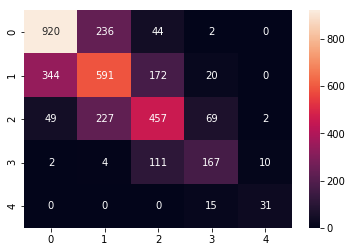

In [278]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')

In [281]:
df['NR'] = df['NIVEL_RIESGO'].astype(str)

In [282]:
columnas = ['APERTURAS',
       'CIERRES', 'PROMEDIO_VENTAS', 'NIVEL_CRECIMIENTO',
       'NIVEL_ESTABILIDAD', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5', 'ANIO_ANTERIOR',
       'PROMEDIO_VENTAS_ANIO_ANTERIOR', 'APERTURAS_ANIO_ANTERIOR',
       'CIERRES_ANIO_ANTERIOR', 'TENDENCIA_APERTURAS',
       'TENDENCIA_CIERRES', 'NR']
columnas_vars = ['APERTURAS',
       'CIERRES', 'NIVEL_CRECIMIENTO',
       'NIVEL_ESTABILIDAD', 'TENDENCIA_APERTURAS',
       'TENDENCIA_CIERRES']


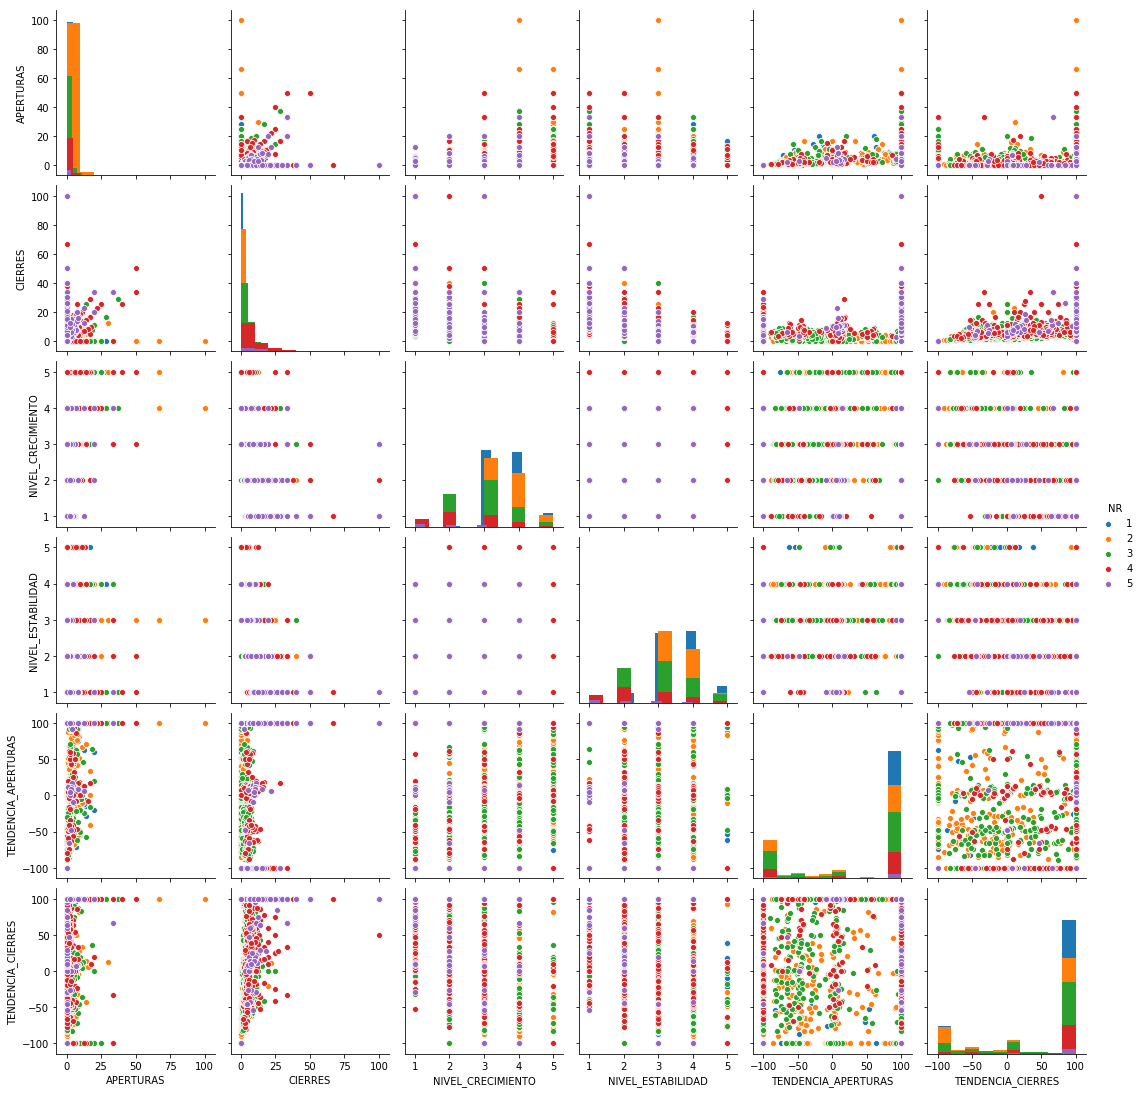

In [283]:
sns.pairplot(data=df[columnas], vars=columnas_vars, diag_kind='hist', hue='NR')

In [284]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [285]:
def scores_knn(X, y, start, stop, step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=3, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores

In [286]:
df_scores= scores_knn(X_train_std, y_train.values.reshape(-1), 2, 20, 2)

In [287]:
df_scores

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.530479,0.003984,2,0.526496,0.534463
1,0.499088,0.006943,4,0.492145,0.506031
2,0.478448,0.008953,6,0.469496,0.487401
3,0.474033,0.008079,8,0.465954,0.482112
4,0.464528,0.009744,10,0.454785,0.474272
5,0.452433,0.011174,12,0.441259,0.463607
6,0.447921,0.009406,14,0.438515,0.457327
7,0.438898,0.008711,16,0.430187,0.447609
8,0.434386,0.009449,18,0.424937,0.443835


In [288]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.530479,0.003984,2,0.526496,0.534463


In [289]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

2

In [290]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train_std, y_train.values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [291]:
accuracy_score(y_train, model_knn.predict(X_train_std))

0.7839109148507247

In [292]:
y_pred_knn = model_knn.predict(X_test_std)

In [294]:
accuracy_score(y_test, y_pred_knn)

0.5611862942700835

In [295]:
from sklearn.naive_bayes import GaussianNB

In [296]:
gnb = GaussianNB()
gnb.fit(X_train_std, y_train.values.reshape(-1))

GaussianNB(priors=None, var_smoothing=1e-09)

In [297]:
y_pred_nb = gnb.predict(X_test_std)

In [298]:
accuracy_score(y_test, y_pred_nb)

0.1986754966887417